# Word Sense Disambiguation
#### Team: Katherine Schlosser, Jiayao Wang, Linying Zhang

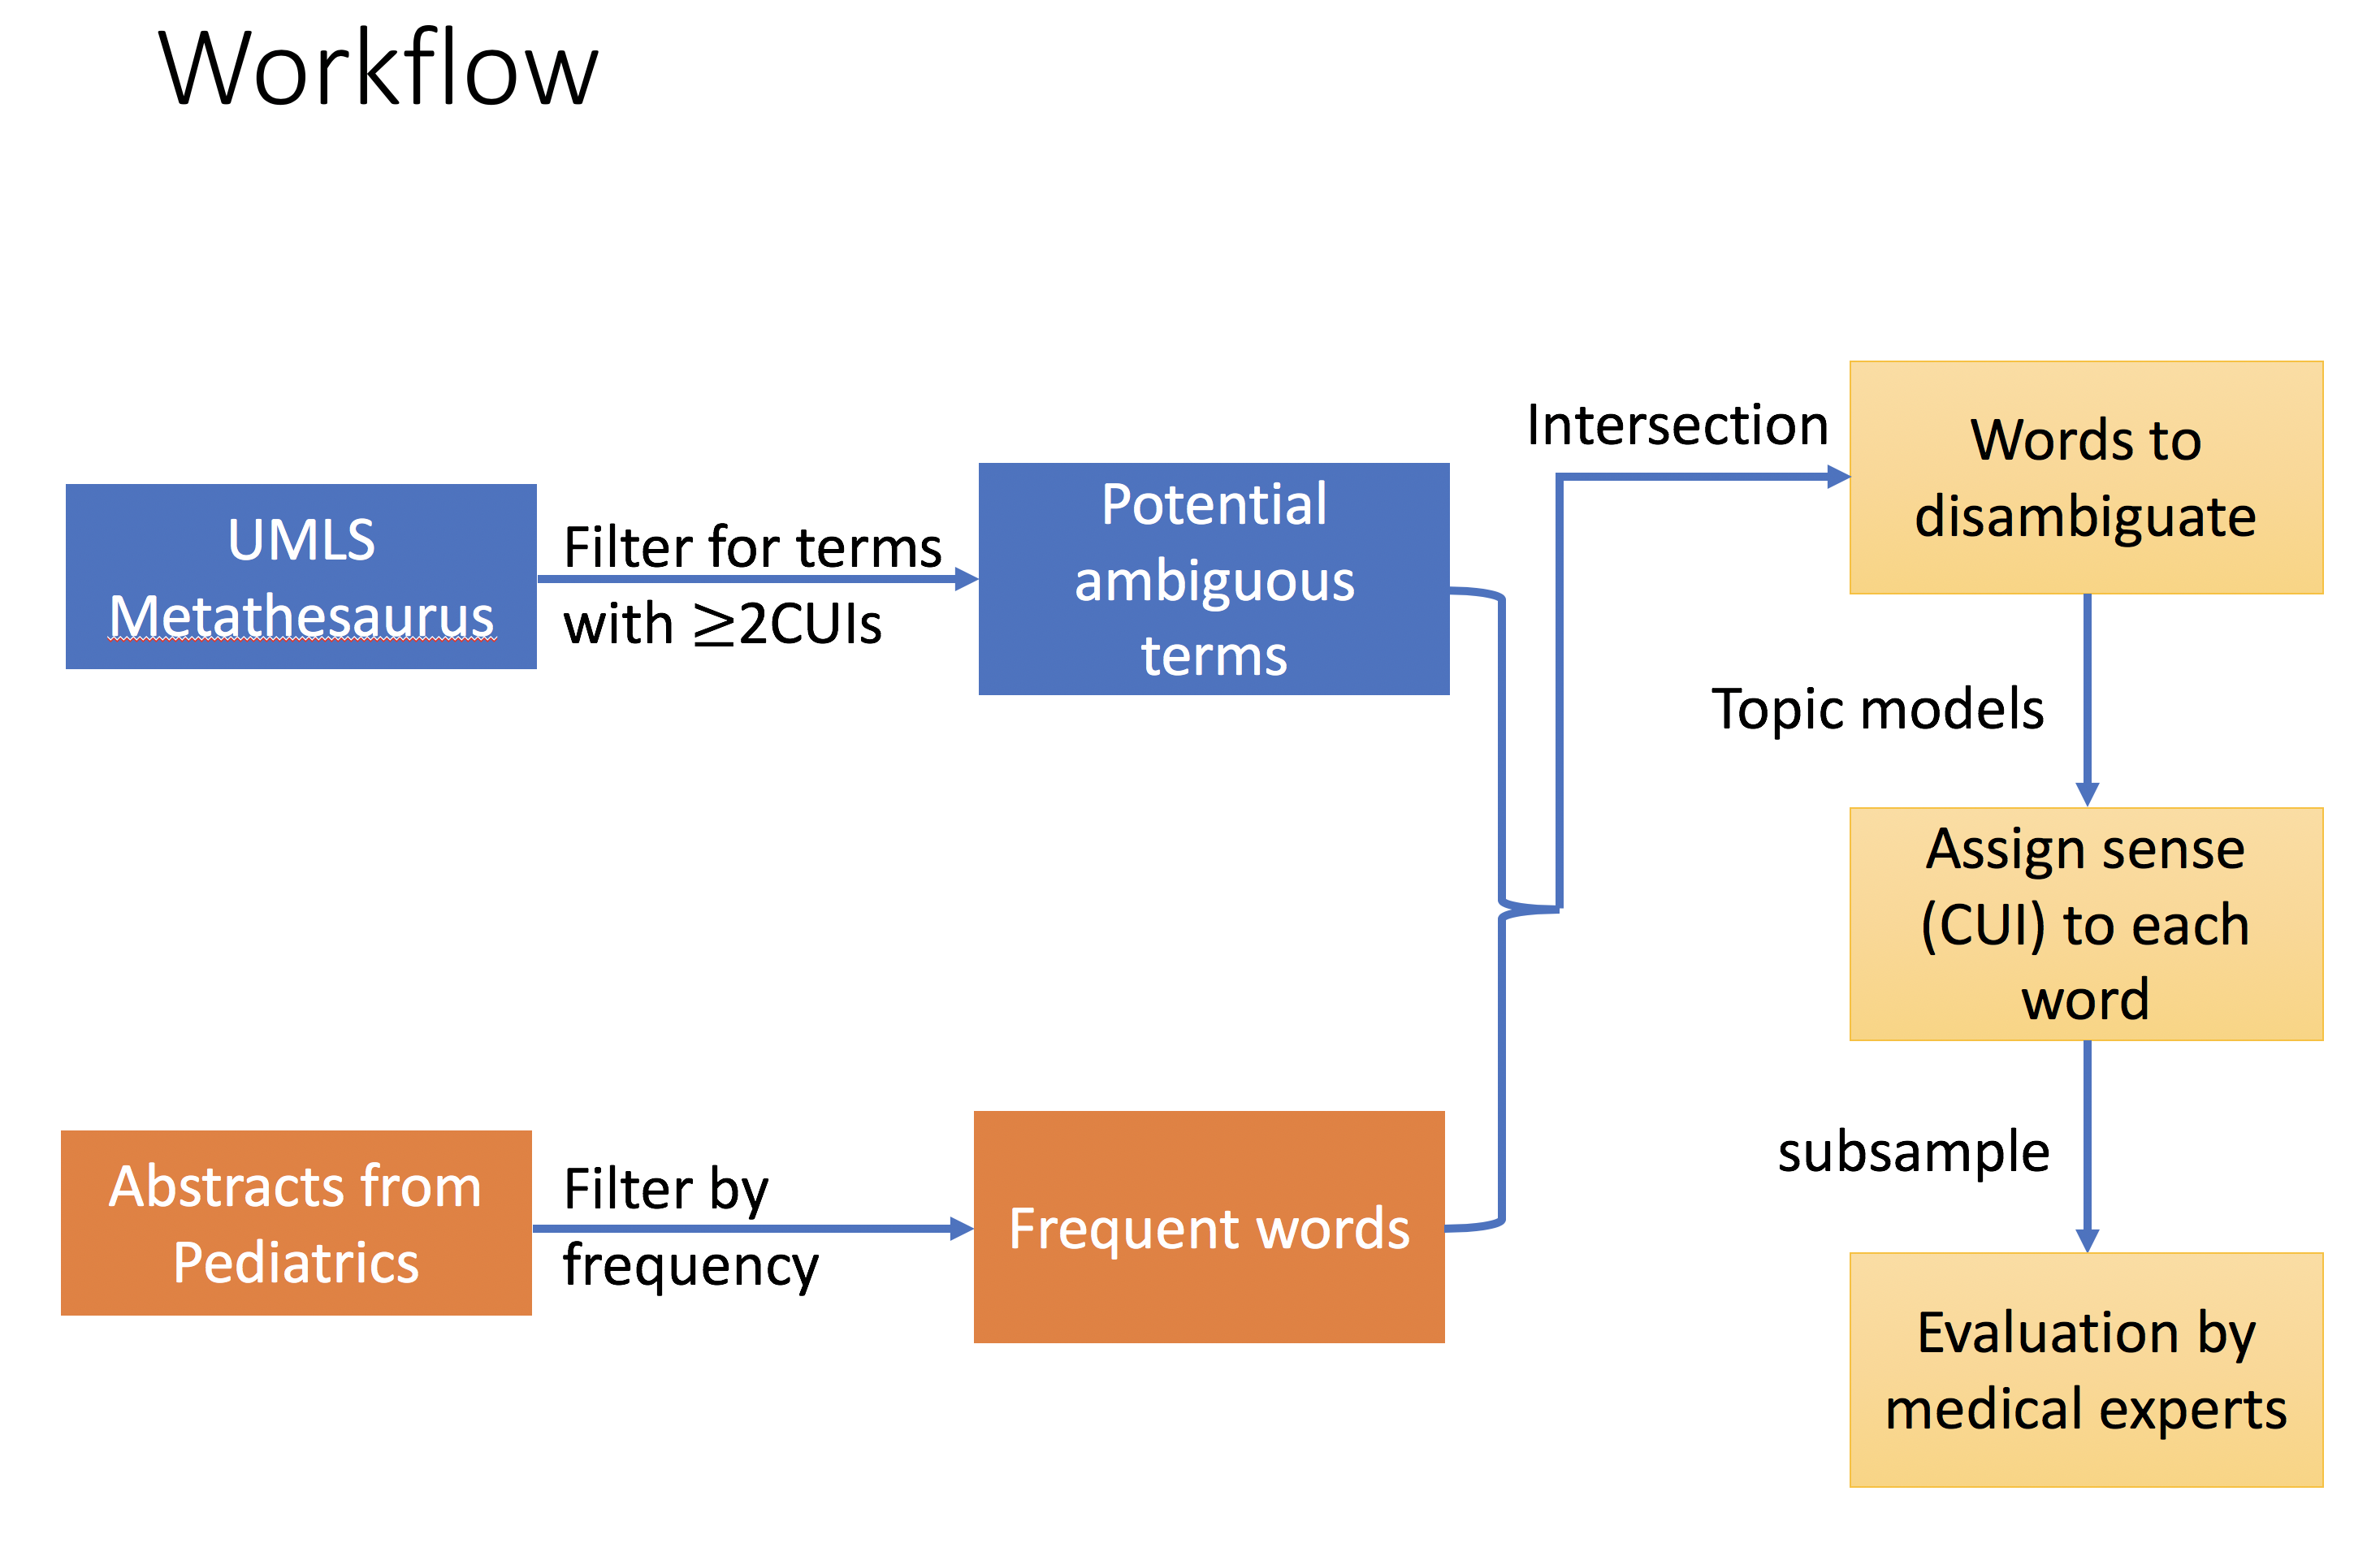

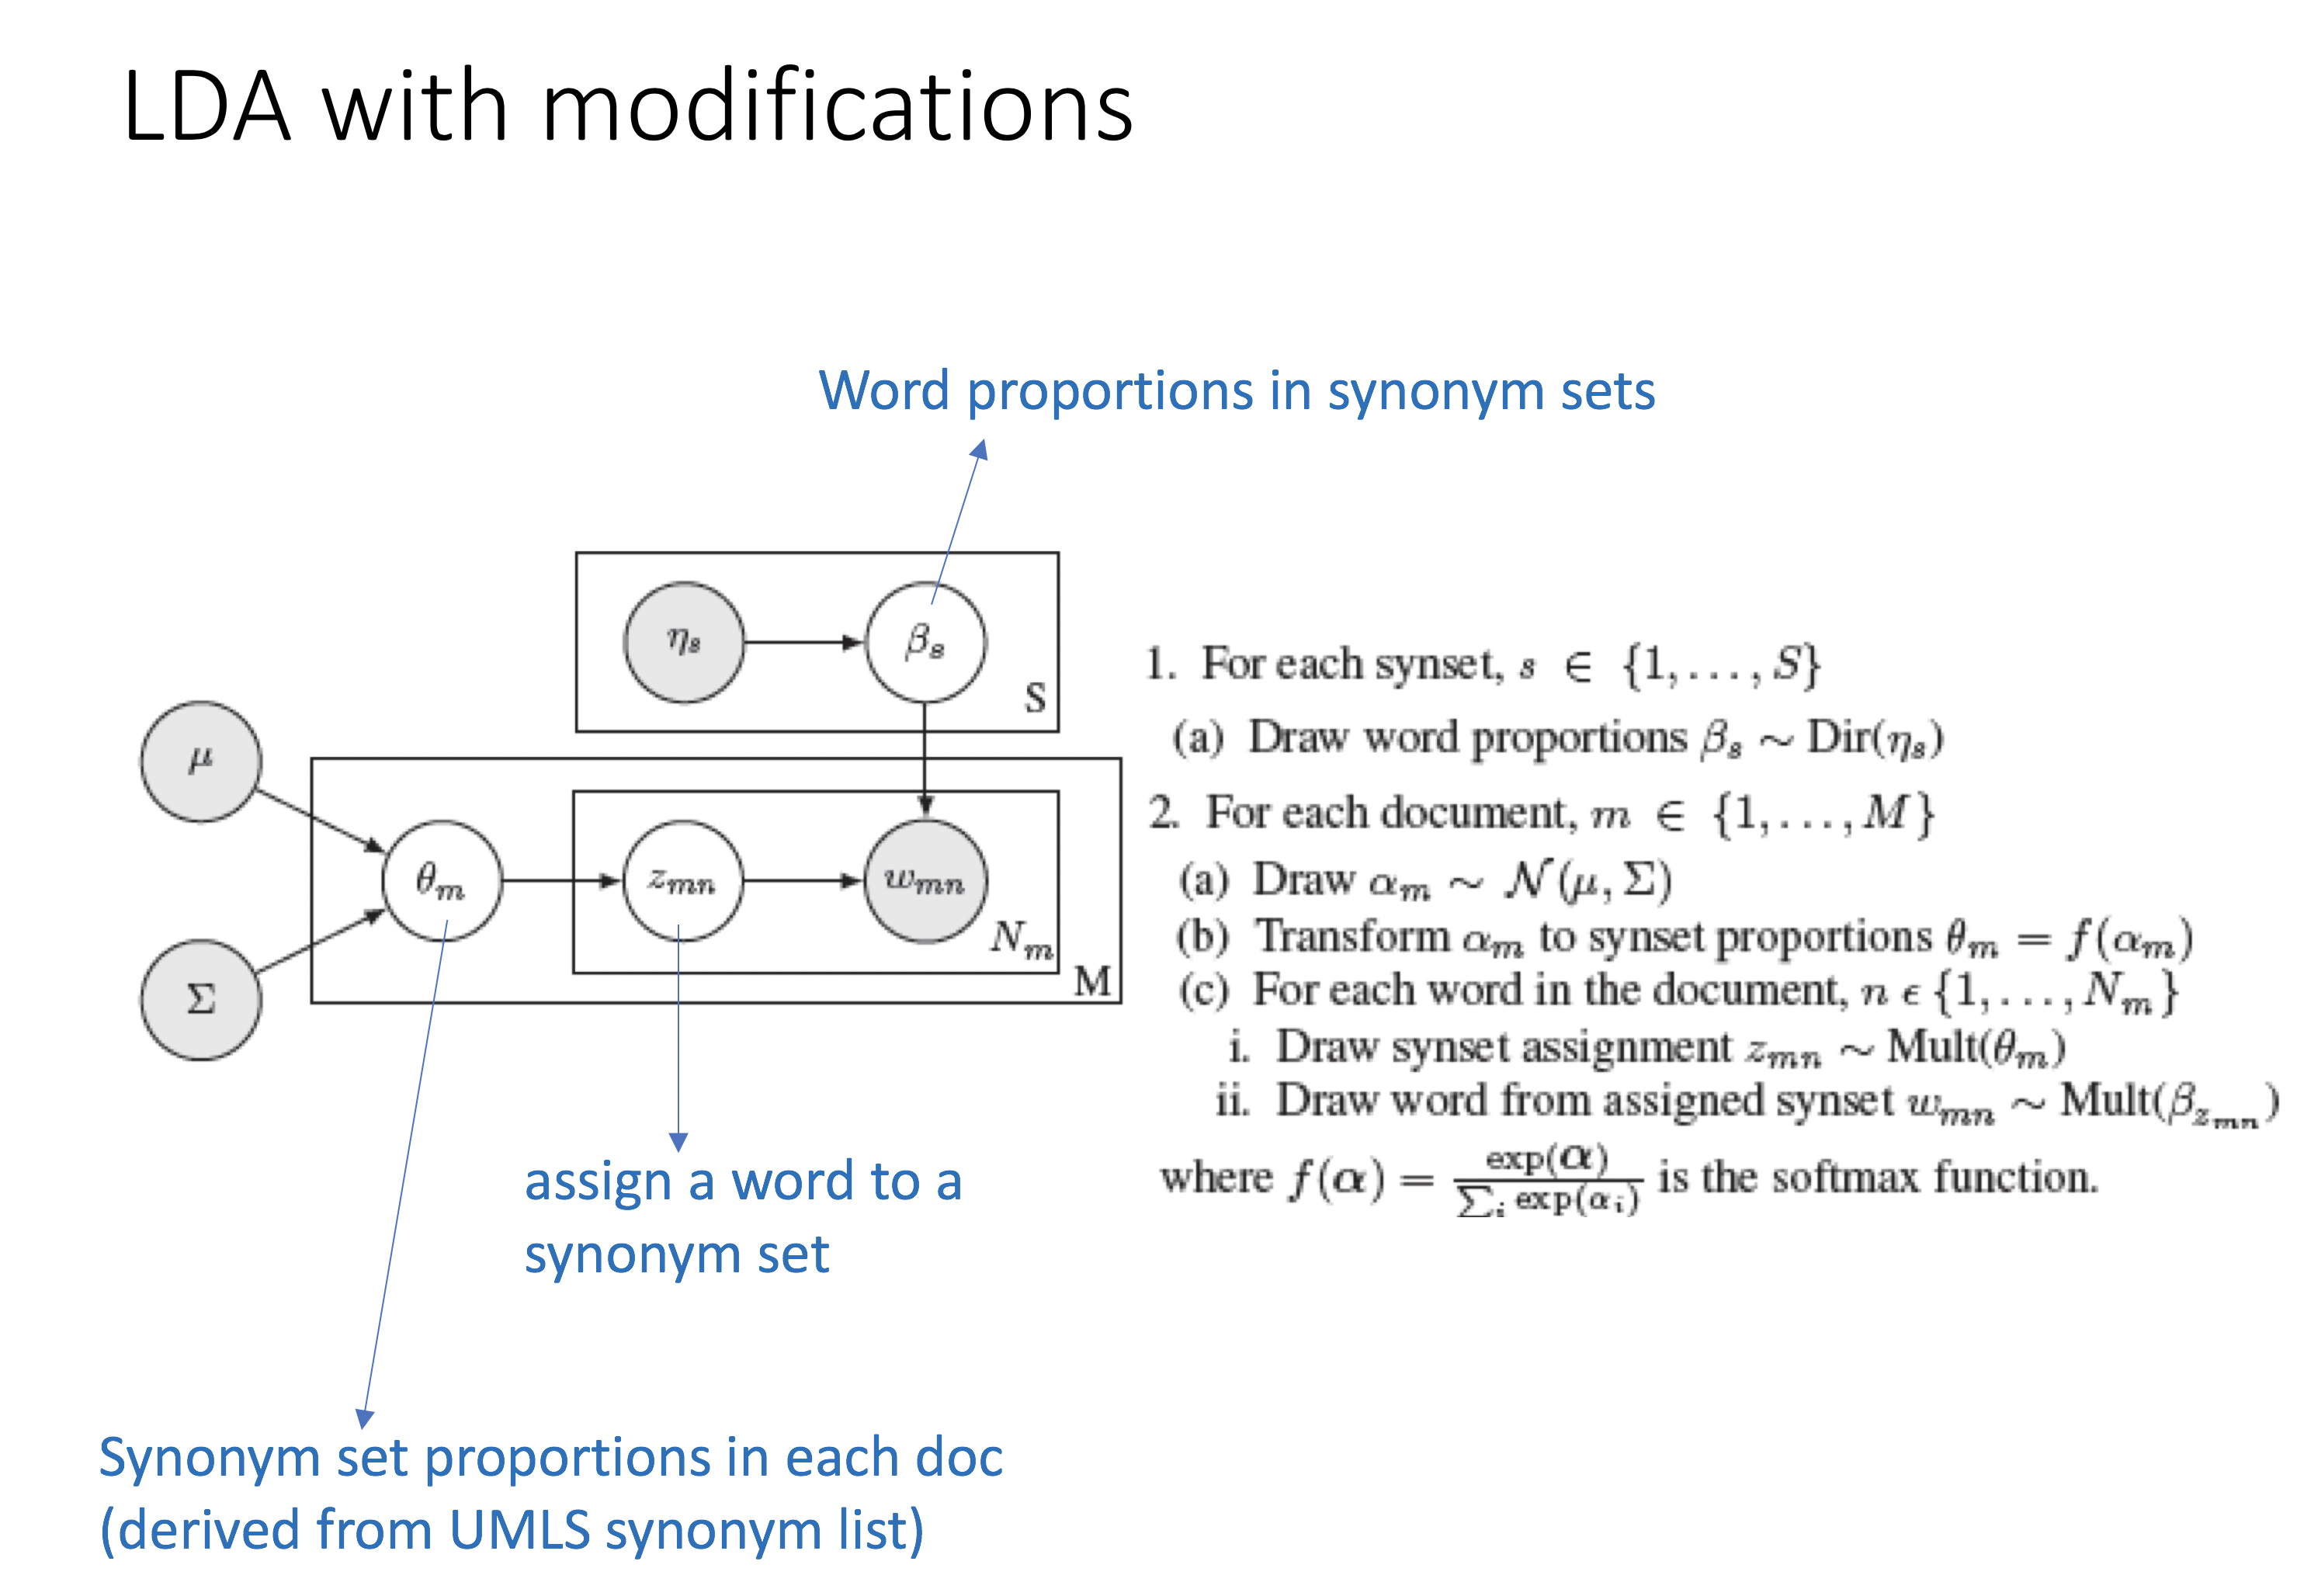

In [139]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(1, '../src')
import format_dat as FMT
import sklearnLDA_jw as LDA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Preprocessing
##### 1. remove pucuations
##### 2. remove stop words
##### 3. convert tense

In [162]:
FMT.stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [152]:
word = "cold"
n_of_nearby_word = 30
source = "MSH"
ins = FMT.DoBagOfWords(word, source, n_of_nearby_word)

In [153]:
word="cold"; num_topics=3; source="MSH"
res, acc = LDA.run(word, num_topics, source, num_top_words=n_of_nearby_word)

Topic 0: ['cold', 'protein', 'stress', 'temperature', 'c', 'expression', 'study', 'induced', 'gene', 'cell', 'degree', 'pain', 'effect', 'growth', 'rat', 'plant', 'group', 'condition', 'model', 'ha', 'low', 'level', 'shock', 'mechanism', 'response', '1', 'acid', 'tissue', 'two']
Topic 1: ['cold', 'patient', 'disease', 'chronic', 'lung', 'obstructive', '1', '2', '0', '5', 'pulmonary', 'method', 'study', 'group', 'change', 'level', 'day', 'clinical', 'result', '6', '4', 'control', 'used', 'significant', 'copd', 'bronchial', '3', 'c', 'year']
Topic 2: ['cold', 'common', 'child', 'cough', 'medication', 'infection', 'study', 'respiratory', 'symptom', 'virus', 'use', 'exacerbation', 'asthma', 'patient', 'influenza', 'nasal', 'objective', 'treatment', 'associated', 'effect', 'acute', 'copd', 'disease', 'year', 'method', 'cause', 'clinical', 'counter', 'chronic', 'ha']
Accuracy:  0.7461538461538462


### Word Cloud For Each Word Sense

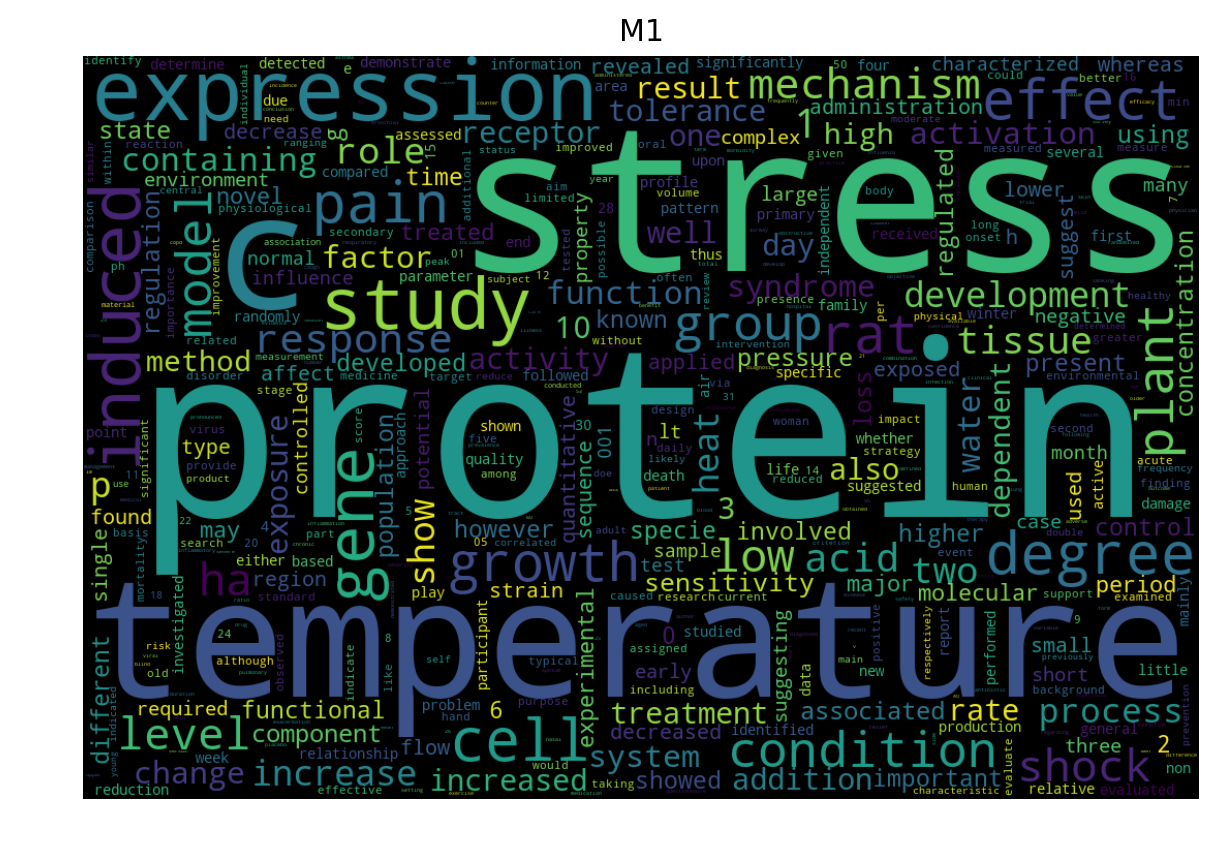

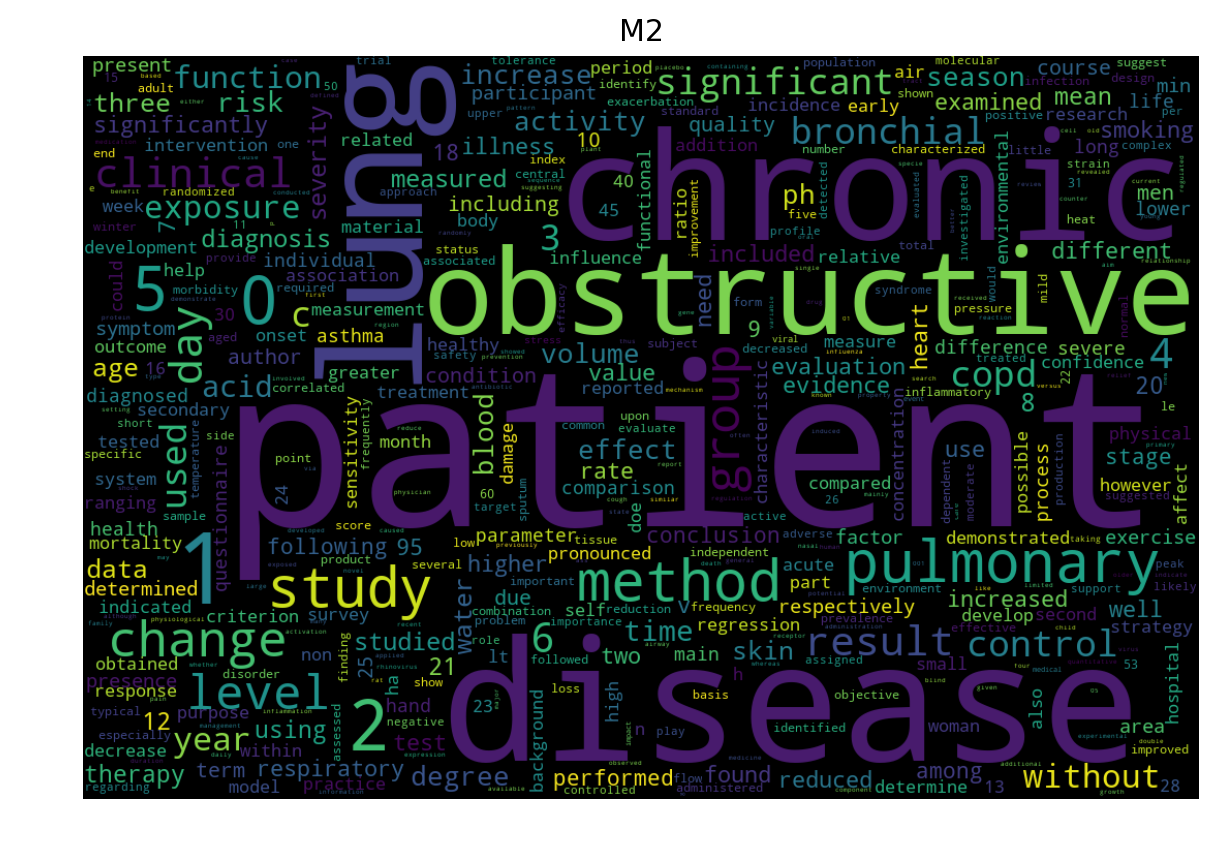

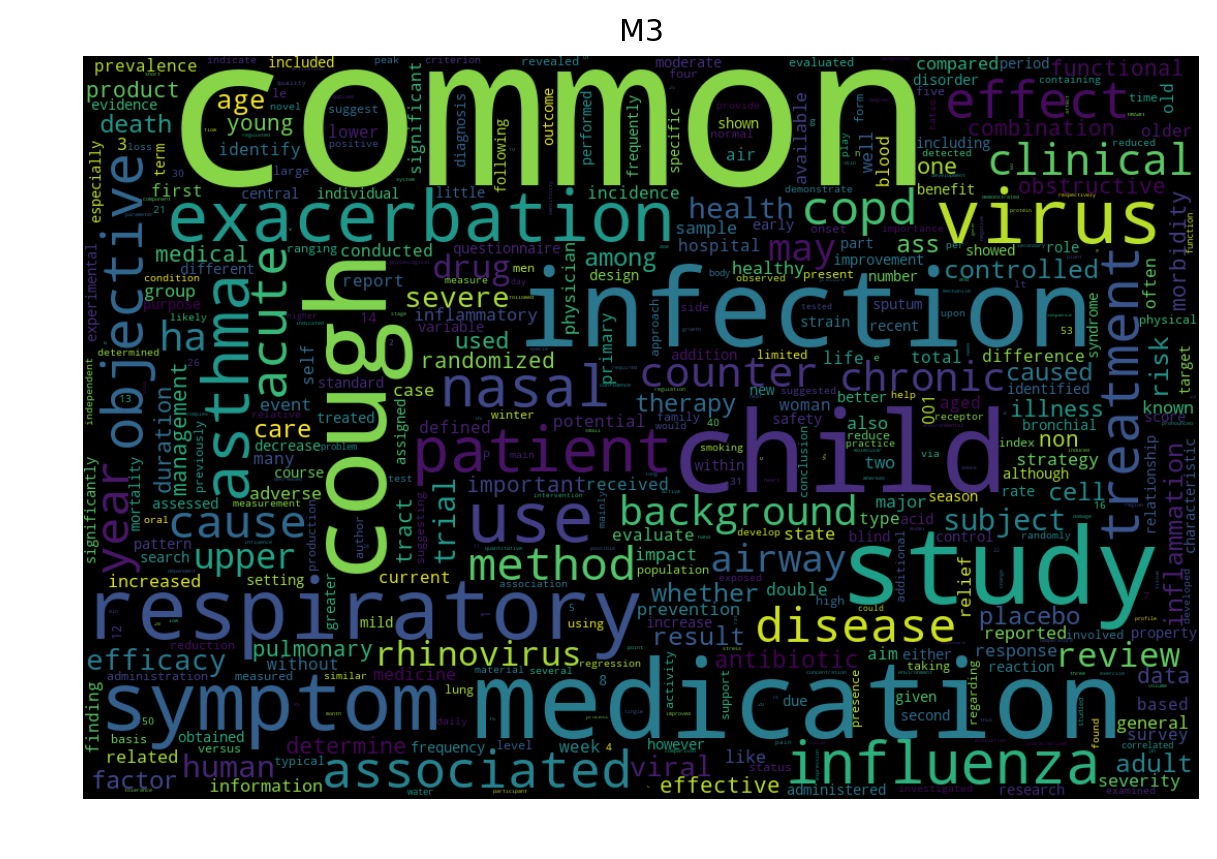

In [154]:
for i, wc in enumerate(res):
    LDA.plt.figure(num=None, figsize=(8, 6), dpi=180, facecolor='w', edgecolor='k')
    LDA.plt.imshow(wc, interpolation='bilinear')
    LDA.plt.axis("off")
    LDA.plt.title("M%d"%(i+1))
    LDA.plt.show()

In [155]:
word = "ventricle"
n_of_nearby_word = 30
source = "MSH"
ins = FMT.DoBagOfWords(word, source, n_of_nearby_word)

In [156]:
word="ventricle"; num_topics=2; source="MSH"
res, acc = LDA.run(word, num_topics, source, num_top_words=n_of_nearby_word)

Topic 0: ['ventricle', 'brain', 'ventricular', 'patient', 'model', 'cell', 'study', 'volume', 'method', '1', 'result', '3', 'lateral', 'cerebral', 'mri', 'system', 'fluid', 'using', 'normal', 'mouse', 'image', 'hydrocephalus', 'csf', 'flow', 'case', 'imaging', 'adult', '2', 'year']
Topic 1: ['ventricle', 'left', 'ventricular', 'heart', 'right', 'cardiac', 'function', 'expression', 'myocardial', 'study', 'change', 'lv', 'rat', 'group', 'result', 'gene', 'patient', 'significant', 'effect', '0', 'protein', 'increased', 'level', 'wall', 'channel', 'rv', 'compared', 'n', 'cell']
Accuracy:  0.898989898989899


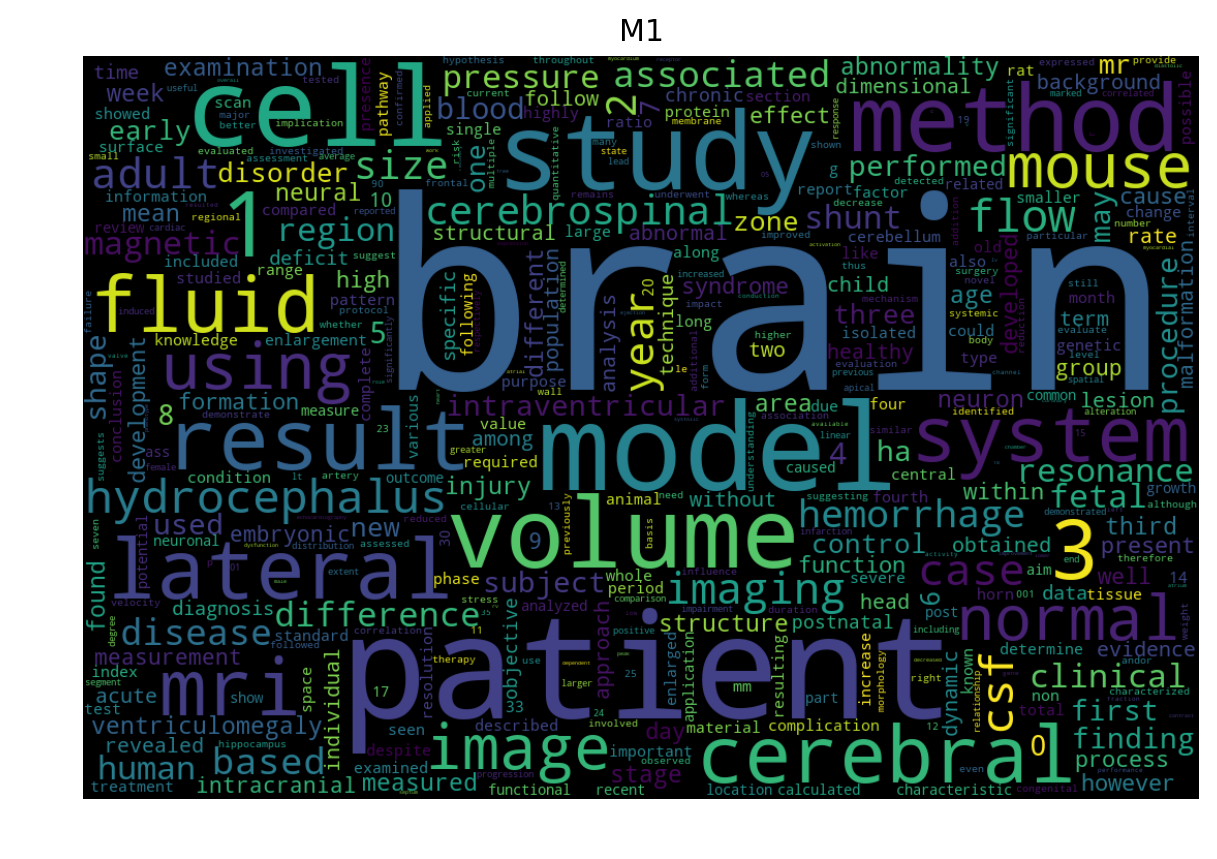

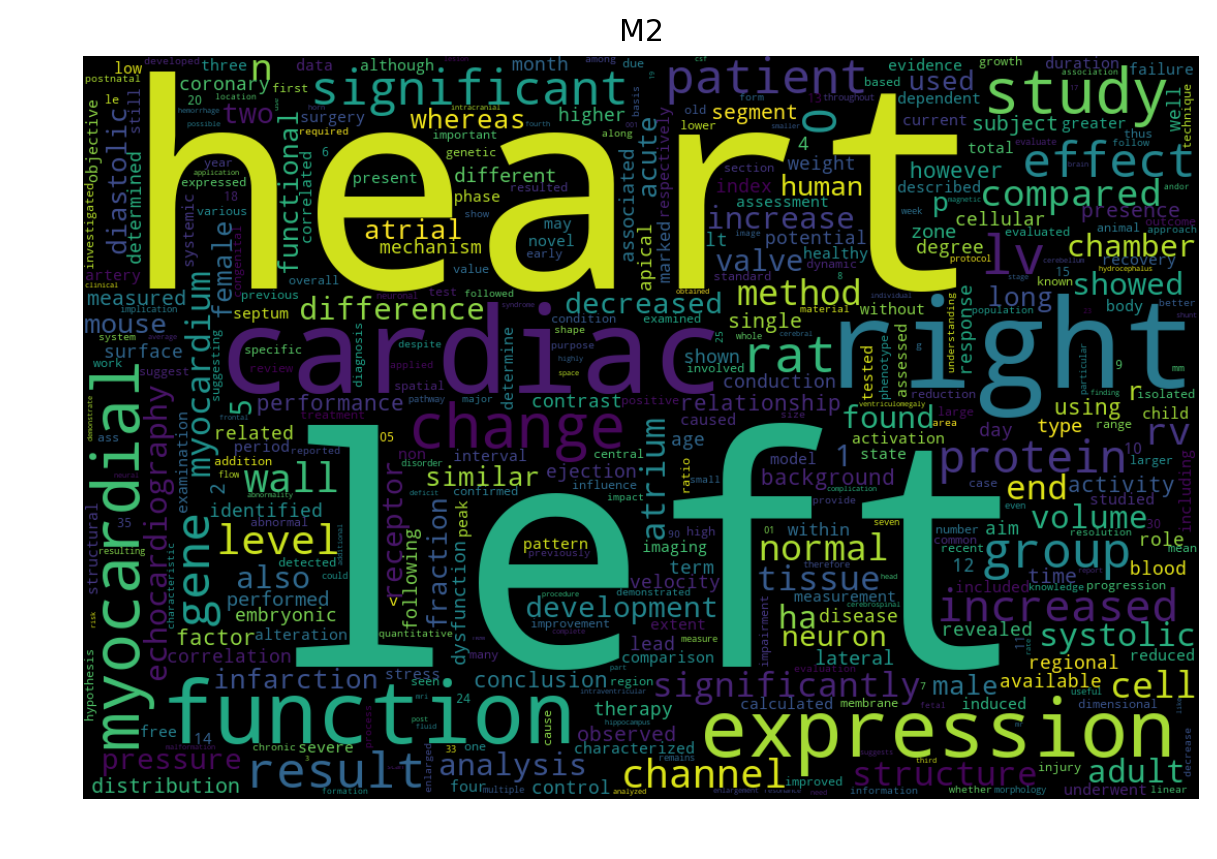

In [157]:
for i, wc in enumerate(res):
    LDA.plt.figure(num=None, figsize=(8, 6), dpi=180, facecolor='w', edgecolor='k')
    LDA.plt.imshow(wc, interpolation='bilinear')
    LDA.plt.axis("off")
    LDA.plt.title("M%d"%(i+1))
    LDA.plt.show()

# Pediatrics

In [164]:
word = "ventricle"
n_of_nearby_word = "10"
source = "Pediatrics"
ins = FMT.DoBagOfWords(word, source, n_of_nearby_word)

In [ ]:
word="ventricle"; num_topics=2; source="MSH"
res, acc = LDA.run(word, num_topics, source, num_top_words=n_of_nearby_word)

## What's the best window size?

In [158]:
word="cold"; num_topics=3; source="MSH"
accs = []
Nearwords = [5, 10, 15, 20, 25, 30, 35, 40, 50, 60]
for n_of_nearby_word in Nearwords:
    ins = FMT.DoBagOfWords(word, source, n_of_nearby_word)
    wc, acc = LDA.run(word, num_topics, source, num_top_words = n_of_nearby_word, verbose=0)
    accs.append(acc)

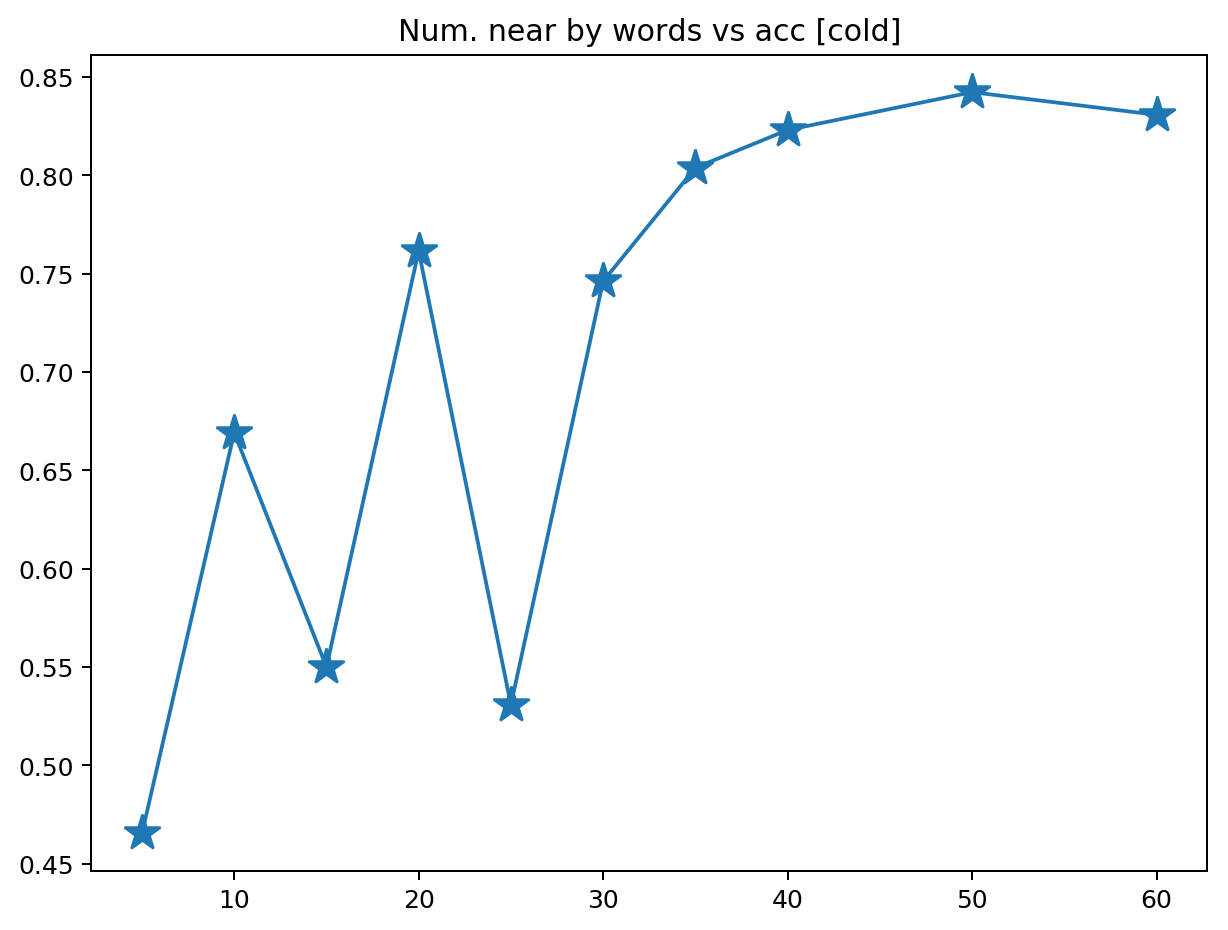

In [159]:
LDA.plt.figure(num=None, figsize=(8, 6), dpi=180, facecolor='w', edgecolor='k')
LDA.plt.plot(Nearwords, accs, marker="*", markersize=15)
LDA.plt.title("Num. near by words vs acc [cold]")
LDA.plt.show()

In [160]:
word = "ventricle"; num_topics=2; source="MSH"
accs = []
Nearwords = [5, 10, 15, 20, 25, 30, 35, 40, 50, 60]
for n_of_nearby_word in Nearwords:
    ins = FMT.DoBagOfWords(word, source, n_of_nearby_word)
    wc, acc = LDA.run(word, num_topics, source, num_top_words = n_of_nearby_word, verbose=0)
    accs.append(acc)

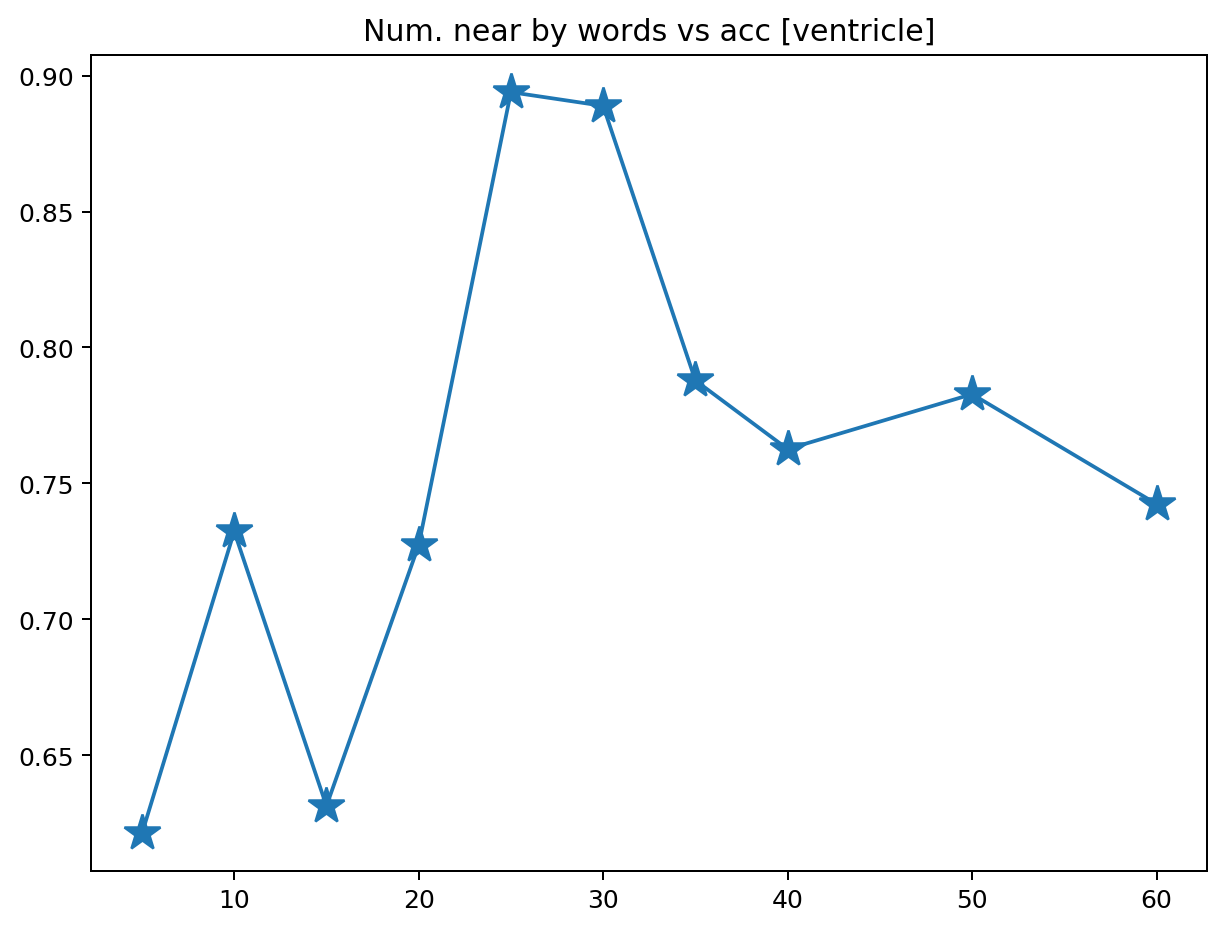

In [161]:
LDA.plt.figure(num=None, figsize=(8, 6), dpi=180, facecolor='w', edgecolor='k')
LDA.plt.plot(Nearwords, accs, marker="*", markersize=15)
LDA.plt.title("Num. near by words vs acc [ventricle]")
LDA.plt.show()

# Compared to other methods

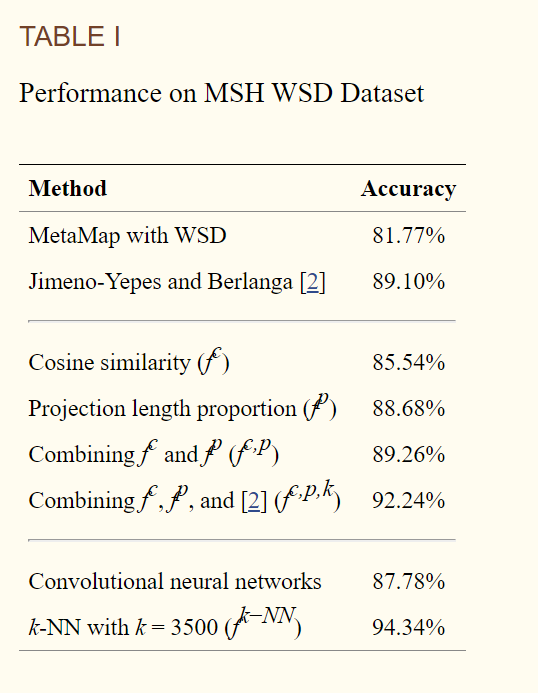

## What we learned
##### 1. Word sense can be represent be it's nearby words. 
##### 2. Best number of nearby words differ with different words, could have relationship with number of senses it has.

## What needs to be done
##### 1. Use word embeddings to automaticlly match word sense with concept sense.
##### 2. Better preprocessing is needed.


### Code and Data Avaiable at https://github.com/zhangly811/WordSenseDetection